# Exploration Data Analysis
---

In [1]:
import pandas as pd
import torch as t 
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

In [28]:
def extract_dataset(ds,type_ex):
    item=ds[type_ex]["item"]
    name=ds[type_ex]["name"]
    description=ds[type_ex]["description"]
    type=ds[type_ex]["type"]
    category=ds[type_ex]["category"]
    subcategory=ds[type_ex]["subcategory"]
    label=ds[type_ex]["label"]
    x=np.array([item,name,description,type,category,subcategory]).T
    y=np.array([label]).T
    return x,y

# Loading of Dataset and Exploration Data Analysis
---

In [3]:
# Read of dataset and save training samples in train.csv and test samples in test.csv
#data_files={'train':'train.csv','test':'test.csv'}
ds=load_dataset("sapienzanlp/nlp2025_hw1_cultural_dataset")

# transform in dataframe of pandas
train_data=pd.DataFrame(ds["train"])
validation_data=pd.DataFrame(ds["validation"])
#test_data=pd.DataFrame(ds["test"])


#x_train,y_train=extract_dataset(ds,"train")
#x_valid,y_valid=extract_dataset(ds,"validation")
#print(x_train)
#print(y_train)
#print(x_valid)
#print(y_valid)

In [4]:
 #Show first 5 numbers of sample + general info of all training dataset
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6251 entries, 0 to 6250
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   item         6251 non-null   object
 1   name         6251 non-null   object
 2   description  6251 non-null   object
 3   type         6251 non-null   object
 4   category     6251 non-null   object
 5   subcategory  6251 non-null   object
 6   label        6251 non-null   object
dtypes: object(7)
memory usage: 342.0+ KB


,item,name,description,type,category,subcategory,label
0,http://www.wikidata.org/entity/Q32786,916,2012 film by M. Mohanan,entity,films,film,cultural exclusive
1,http://www.wikidata.org/entity/Q371,!!!,American dance-punk band from California,entity,music,musical group,cultural representative
2,http://www.wikidata.org/entity/Q3729947,¡Soborno!,Mort & Phil comic,entity,comics and anime,comics,cultural representative
3,http://www.wikidata.org/entity/Q158611,+44,American band,entity,music,musical group,cultural representative
4,http://www.wikidata.org/entity/Q280375,1 Monk Street,"building in Monmouth, Wales",entity,architecture,building,cultural exclusive


In [6]:
#statistical description 
train_data.describe(include='all') 

,item,name,description,type,category,subcategory,label
count,6251,6251,6251,6251,6251,6251,6251
unique,6251,6245,5672,2,19,108,3
top,http://www.wikidata.org/entity/Q129298,central government,film genre,entity,politics,politician,cultural exclusive
freq,1,2,32,3924,532,99,2691


[<Axes: > <Axes: > <Axes: >]
type
category
label


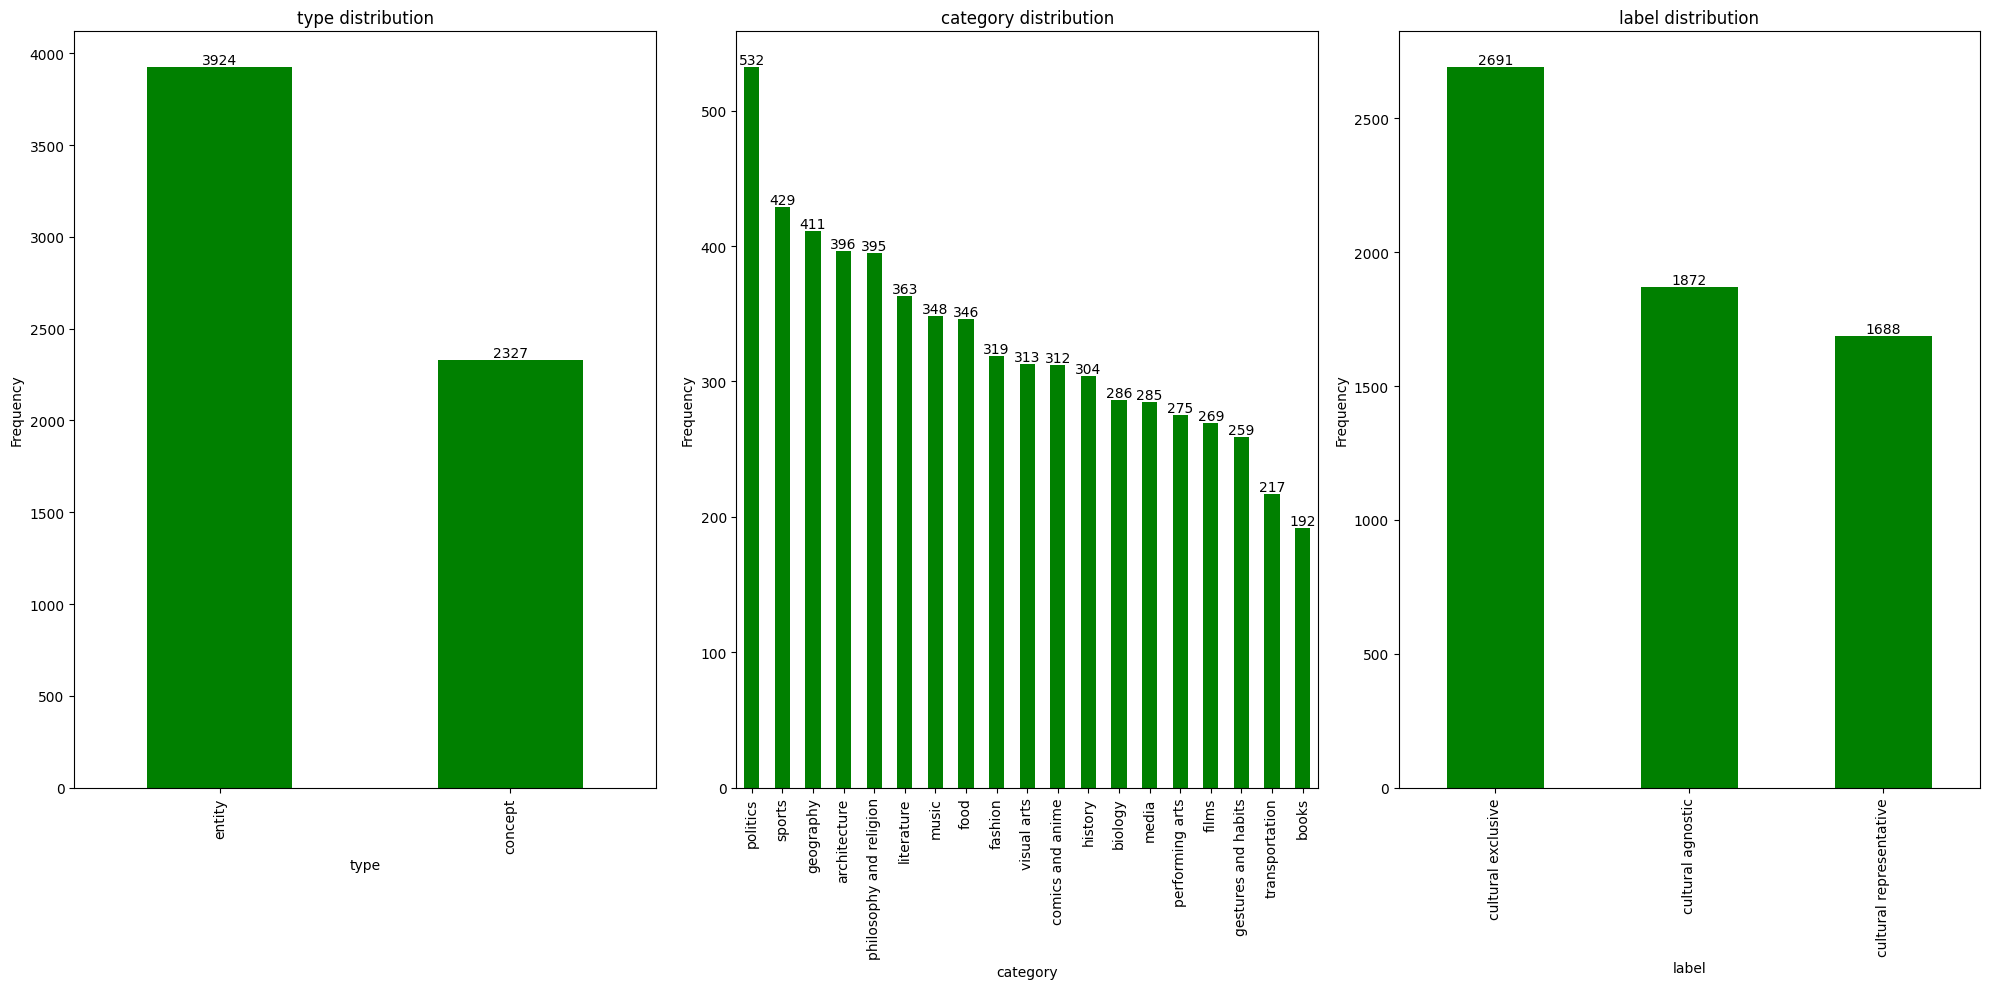

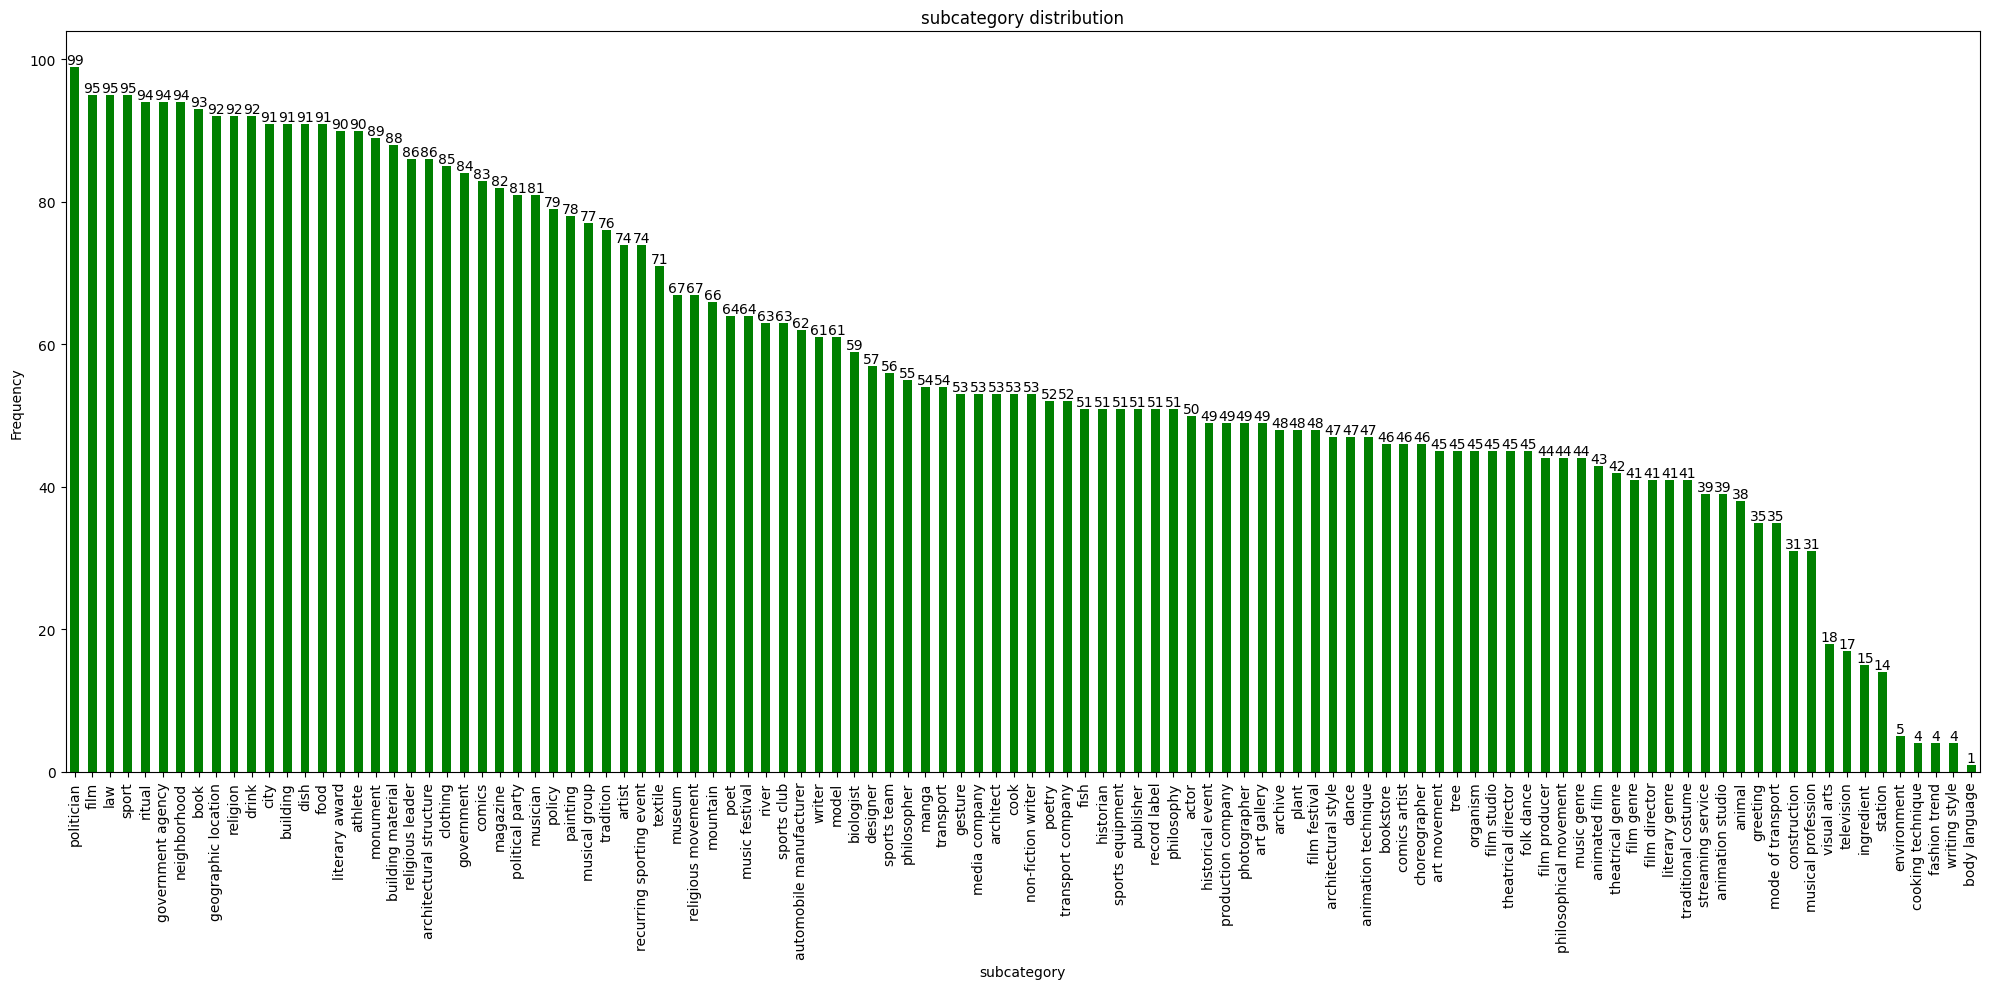

In [49]:
#histogram for all  training dataset using features:type,category,label
set_features=["type","category","label"]

#plots of number of samples which contains that value associated to type, category,label 
fig,axes=plt.subplots(1,3,figsize=(10*2,10))
print(axes)
axes = axes.flatten()
for i,feature in enumerate(set_features):
    print(feature)
    ax=train_data[feature].value_counts().plot(kind="bar",ax=axes[i],color="green")
    ax.bar_label(ax.containers[0]) #inserts frequency value on top of bar 
    ax.set_title(f'{feature} distribution')
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
   # axes[i].tick_params(axis='x',)
plt.tight_layout() #adapt representation of histograms
plt.show()

#plot for feature subcategory 
plt.figure(figsize=(20, 10))  
ax=train_data["subcategory"].value_counts().plot(kind="bar",color="green")
ax.bar_label(ax.containers[0])
ax.set_title("subcategory distribution")
ax.set_xlabel("subcategory")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
# Percentage of number of examples for every category